In [23]:
%matplotlib inline

import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import MESS

## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Where do you want simulations to live?
analysis_dir = "/home/isaac/Continuosity/MESS/analysis/figure3-sims/"
ipyclient = ipp.Client(cluster_id="MESS-Rich")
print(len(ipyclient))

39


![Figure3 Cartoon](imagename.png "Title")

## Generate simulations for figure 3
Here we fix all parameters except speciation rate and community assembly model. Generate 1000 simulations for each of the configurations (hi, lo, no speciation) and (neut, filt, comp) assembly.

In [ ]:
r = MESS.Region("figure3")
## Region params
r.set_param("project_dir", analysis_dir)
r.set_param("generations", 0)
r.set_param("mutation_rate", 2.2e-8)
r.set_param("alpha", 2000)

## Metacommunity Params
r.set_param("S_m", 500)
r.set_param("J_m", 750000)
r.set_param("speciation_rate", 2)
r.set_param("death_proportion", 0.7)
r.set_param("trait_rate_meta", 2)
r.set_param("ecological_strength", 5)

## Local Params
r.set_param("J", 1000)
r.set_param("m", 0.005)
r.set_param("background_death", 0.25)

for model in ["neutral", "filtering", "competition"]:
    for sp_prob in [0, 0.0001, 0.001]:
        r.set_param("community_assembly_model", model)
        r.set_param("speciation_prob", sp_prob)
        r.write_params(outfile="params-fig3-{}-sp{}.txt".format(model, sp_prob), force=True)
        r.run(sims=1000, ipyclient=ipyclient)

    Generating 1000 simulation(s).
  [######              ]  31%  Performing Simulations    | 0:05:06 | 

## Generate the figure

In [4]:
sim_df = pd.read_csv(analysis_dir + "SIMOUT.txt", sep="\t", header=0)
sim_df.sort_values(by=['_lambda'])

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,background_death,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
857,500,1998870,2.0,0.7,2.0,9.8955,0.0,neutral,point_mutation,0.0,2186,570.0,1000.0,0.0044,0.0008,0.25,2.0,0.003,0.0040,0.0010,0.5882,7.0792,3.0,1.0244,1.0065,1.0049,1.0043,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-3.0000,0.0000,0.0000,0.0041,0.0051,0.6843,-1.5000,0.0011,0.0056,0.0,621.0750,618.4829,618.2450,618.1655,-0.9797,1.1976,0.3338,-1.5000,-1.2560,1.4471,0.6602,3.6329,0.1652,-0.2405,0.4132,4.7579,1.6399,2.4353,-0.1686,1.2595,1.6692,3.3108,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
588,500,2437825,2.0,0.7,2.0,6.0460,0.0,neutral,point_mutation,0.0,2990,570.0,1000.0,0.0040,0.0006,0.25,2.0,0.004,0.0020,0.0000,0.5882,-3.2252,2.0,1.0118,1.0031,1.0024,1.0021,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-3.0000,0.0000,0.0000,0.0092,0.0017,-0.0000,-2.0000,0.0092,0.0017,0.0,637.0016,637.0016,637.0016,637.0016,-0.1186,3.6384,0.0000,-2.0000,-0.1186,3.6384,0.7890,2.8845,0.0844,-0.2939,0.8617,3.7913,0.9076,-0.7538,0.0844,1.7061,0.9803,0.1529,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
115,500,544344,2.0,0.7,2.0,1.3416,0.0,neutral,point_mutation,0.0,709,570.0,1000.0,0.0014,0.0004,0.25,4.0,0.008,0.0015,0.0010,0.5882,3.0645,2.0,1.0539,1.0186,1.0140,1.0125,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-3.0000,0.0000,0.0000,0.0008,0.0008,0.0000,-2.0000,0.0008,0.0008,0.0,109.2593,109.2593,109.2593,109.2593,-4.0337,1.2977,0.0000,-2.0000,-4.0337,1.2977,-1.1284,4.3711,-0.2836,-0.9071,-0.4835,7.7678,2.9053,3.0734,-0.2836,1.0929,3.5502,6.4701,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
31,500,2348186,2.0,0.7,2.0,2.8510,0.0,neutral,point_mutation,0.0,1602,570.0,1000.0,0.0089,0.0007,0.25,1.0,0.010,0.0040,0.0000,0.5882,4.4166,3.0,1.1352,1.0523,1.0394,1.0350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-3.0000,0.0000,0.0000,0.0050,0.0040,0.6585,-1.5000,0.0028,0.0046,0.0,55.5140,49.0543,47.1311,46.3615,-0.7190,1.3308,-0.7050,-1.5000,0.1795,1.4321,0.2149,2.8697,-0.1830,0.3489,0.3845,3.5539,0.9340,1.5389,0.5219,1.8489,0.2051,2.1218,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
362,500,3602481,2.0,0.7,2.0,8.6162,0.0,neutral,point_mutation,0.0,956,570.0,1000.0,0.0079,0.0008,0.25,1.0,0.012,0.0080,0.0000,0.5882,-1.5050,7.0,1.1997,1.0630,1.0471,1.0418,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-3.0000,0.0000,0.0000,0.0155,0.0139,0.0823,-1.8378,0.0132,0.0296,0.0,135.4439,111.9073,103.5385,98.7289,0.5595,3.1672,0.1564,-0.6271,1.3205,3.3469,0.8305,2.9398,-0.0587,-0.2351,1.0251,4.1664,0.2710,-0.2274,-0.2151,0.3920,-0.2954,0.8194,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
276,500,4108932,2.0,0.7,2.0,6.2534,0.0,neutral,point_mutation,0.0,4016,570.0,1000.0,0.0025,0.0004,0.25,14.0,0.012,0.0023,0.0014,0.5882,1.4455,5.0,1.0713,1.0203,1.0152,1.0135,1.0000,1.0000,1.0000,1.0000,0.0002,0.0004,1.5000,0.2500,0.0000,0.0000,0.0071,0.0058,0.9093,-0.4155,0.0047,0.0033,0.0,329.8099,305.4091,293.7132,286.0087,4.3452,3.2351,-0.1726,-0.9118,4.9442,3.0001,2.9624,2.6475,-0.0452,-0.6211,3.0671,4.0115,-1.3828,-0.5877,0.1274,0.2907,-1.8772,1.0114,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79,500,947155,2.0,0.7,2.0,2.9301

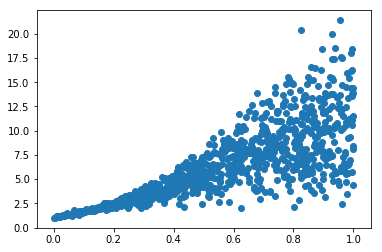

In [19]:
plt.scatter(sim_df["_lambda"], sim_df["abund_h1"])